# Projeto Final - 2018  

## X-ray Pneumonia Classification
* Felipe Souza
* Pedro Augusto
* Rafael Dias
* Sergio Marinello


## Part 04 Transform Data

1. Healthy 
2. Pneumonia viral 
3. Pneumonia bacterial

### Data
#### Data Source
O dataset pode ser obtido em:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


In [1]:
ROOT_DIR = "../input" #kaggle/git dir
                                                                                                                                                                                                                                                
# Import library
import os
if not (os.path.exists(ROOT_DIR)):
    print("Using git repository")
    ROOT_DIR = "./kowaslki/input" #colab dir
    if not (os.path.exists(ROOT_DIR)):    
        print("Checking out git repository")
        !git clone https://gitlab.com/rafa.apps/kowaslki.git
else:
    print("Using kaggle repository")


Using kaggle repository


## Verificação dos dados

In [2]:
%matplotlib inline

# Basic math libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Take note that the .7z directory name is automatically converted to lowercase. 
INPUT_DIR = '%s/chest_xray/chest_xray' % ROOT_DIR

import os.path
# Ensure we're reading the directory correctly.
assert (os.path.exists(INPUT_DIR))

First, locate the main directory and display its content.

In [3]:
directory = os.listdir(INPUT_DIR)
print("Parent directory includes these folders:", directory)

('Parent directory includes these folders:', ['.DS_Store', 'test', 'train', 'val'])


#### Pasta raiz contem train, test, and validation

In [4]:
datasetDir = INPUT_DIR
train_folder = '%s/train/' % datasetDir 
val_folder   = '%s/val/' % datasetDir
test_folder  = '%s/test/' % datasetDir

# Plot de uma imagem normal e uma com pneumonia

## Plot samples images

../input/chest_xray/chest_xray/train/NORMAL/IM-0586-0001.jpeg
../input/chest_xray/chest_xray/train/PNEUMONIA/person576_virus_1120.jpeg
../input/chest_xray/chest_xray/train/PNEUMONIA/person1875_bacteria_4756.jpeg


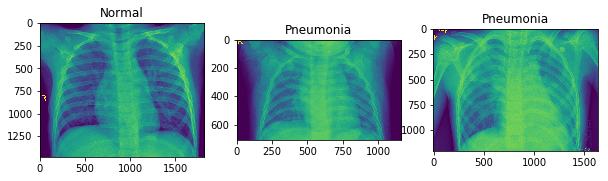

In [5]:
from skimage.io import imread

# train 
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'
# validation
val_n = val_folder + 'NORMAL/'
val_p = val_folder + 'PNEUMONIA/'
# test
test_n = test_folder + 'NORMAL/'
test_p = test_folder + 'PNEUMONIA/'

# plot images
f = plt.figure(figsize = (10, 10))

#imagem 1
filename =  os.listdir(train_n)[np.random.randint(0, len(os.listdir(train_n)))]
pic_path = train_n + filename
print(pic_path)
norm_image  = imread(pic_path)

# add_subplot(nrows, ncols, index, **kwargs)
a1 = f.add_subplot(1, 3, 1)
img_plot = plt.imshow(norm_image)
a1.set_title('Normal')

#imagem 2
filename =  os.listdir(train_p)[np.random.randint(0, len(os.listdir(train_p)))]
pic_path = train_p + filename
print(pic_path)
sic_image  = imread(pic_path)

a2 = f.add_subplot(1, 3, 2)
img_plot = plt.imshow(sic_image)
a2.set_title('Pneumonia')

#imagem 3
filename =  os.listdir(train_p)[np.random.randint(0, len(os.listdir(train_p)))]
pic_path = train_p + filename
print(pic_path)
sic_image  = imread(pic_path)

a2 = f.add_subplot(1, 3, 3)
img_plot = plt.imshow(sic_image)
a2.set_title('Pneumonia') 

#### Identificamos que existem diferentes dimensões e as vezes tonalidade em preto e branco.

## Método para identificar o os arquivos por treino/validação e teste e em normal e tipos de pneumonia

In [6]:
nbClasses = 3

# classes
NORMAL=0
BACTERIA=1
VIRUS=2

def load_df(protocol, root_path="./"):
    if protocol == 0 or protocol == 'original':
        df = pd.read_csv(os.path.join(root_path, 'protocol0.csv'))
    elif protocol == 1 or protocol == 'alternative':
        df = pd.read_csv(os.path.join(root_path, 'protocol_alternative.csv'))

    return df

def getDatasetSize(df, split='train', types=[NORMAL,BACTERIA,VIRUS], stratify='Class2', 
                    balanced=False, base_path=INPUT_DIR):
    if split not in ["train", "val", "test"]:
        raise ValueError(split + " not recognized. Did you mean 'train', 'val' or 'test'?")
    step = "%s  distribution" % split
    df = df[df.Set == split]
    
    #Get all file names for that split
    if not type(types) in (list, tuple):
        types = [types]
    
    indexes = {clazz: df[df[stratify] == clazz].index.tolist() for clazz in df[stratify].unique()}
    indexes = {k:l for k,l in indexes.items() if len(l) > 0}
    
    if balanced:
        lenght = min(map(len, indexes.values()))
    else:
        lenght = max(map(len, indexes.values()))

    indexes = {clazz: values[:lenght] for clazz, values in indexes.items()}
    
    n = sum([len(v) for v in indexes.values()])
    return n

def getDatasetFiles(df, split='train', types=[NORMAL,BACTERIA,VIRUS], stratify='Class2', 
                    balanced=False, shuffle=False, base_path=INPUT_DIR):
    if split not in ["train", "val", "test"]:
        raise ValueError(split + " not recognized. Did you mean 'train', 'val' or 'test'?")
    step = "%s  distribution" % split
    #df = df[df.Set == step]
    
    #Get all file names for that split
    if not type(types) in (list, tuple):
        types = [types]
    
    indexes = {clazz: df[df[stratify] == clazz].index.tolist() for clazz in df[stratify].unique()}
    indexes = {k:l for k,l in indexes.items() if len(l) > 0}
    
    if balanced:
        lenght = min(map(len, indexes.values()))
    else:
        lenght = max(map(len, indexes.values()))

    if shuffle:
        indexes = {clazz: np.random.choice(values, size=lenght, replace=True) for clazz, values in indexes.items()}
    else:
        indexes = {clazz: values[:lenght] for clazz, values in indexes.items()}
    
    import glob
    fileNames = {}
    if NORMAL in types:
        fileNames[NORMAL] = ["%s/%s" % (base_path, df["Path"][df[df.index == row_idx].index[0]]) for row_idx in indexes["normal"]]
    if BACTERIA in types:        
        fileNames[BACTERIA] = ["%s/%s" % (base_path, df["Path"][df[df.index == row_idx].index[0]]) for row_idx in indexes["bacteria"]]
    if VIRUS in types:
        fileNames[VIRUS] = ["%s/%s" % (base_path, df["Path"][df[df.index == row_idx].index[0]]) for row_idx in indexes["virus"]]
        
    fileNames = {clazz: [v for v in values] for clazz, values in fileNames.items()}
    
    return fileNames

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          width=8,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    #print(cm)
    f, ax = plt.subplots(1, 1, figsize=(width, width))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticklabels(classes)
    ax.grid(False)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    ax.set_xlabel('Predicted label')
    #axis[ax].axis('off')
    plt.tight_layout()
    return cm

## Verificando os subtipos de pneumonia

In [7]:
df_protocol2 = load_df('alternative', root_path="./")

train_bacteria = getDatasetSize(df_protocol2, split='train', types=[BACTERIA])
train_virus = getDatasetSize(df_protocol2, split='train', types=[VIRUS])
val_bacteria = getDatasetSize(df_protocol2, split='val', types=[BACTERIA])
val_virus = getDatasetSize(df_protocol2, split='val', types=[VIRUS])
test_bacteria = getDatasetSize(df_protocol2, split='test', types=[BACTERIA])
test_virus = getDatasetSize(df_protocol2, split='test', types=[VIRUS])

print("train bacteria: %d" % train_bacteria)
print("train virus: %d" % train_virus)
print("val bacteria: %d" % val_bacteria)
print("val virus: %d" % val_virus)
print("test bacteria: %d" % test_bacteria)
print("test virus: %d" % test_virus)

train bacteria: 8370
train virus: 8370
val bacteria: 2094
val virus: 2094
test bacteria: 1248
test virus: 1248


## Aplicando LBP

In [8]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.transform import resize

import numpy as np

class LBP:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = local_binary_pattern(image, self.numPoints,
                                   self.radius, method="uniform")

        # return the histogram of Local Binary Patterns
        return lbp.flatten()

def crop_imread(img_pre, crop=[64,64]):
    "Function to crop center of an image file"
    ysize, xsize = np.array(img_pre).shape
    xoff = (xsize - crop[0]) // 2
    yoff = (ysize - crop[1]) // 2
    img = img_pre[yoff:-yoff,xoff:-xoff]
    return img


def process_files(df, func, subSet="train", image_reshape=(916, 916)):
    """ Process dataset files using a custom function """
    categ_files = getDatasetFiles(df, subSet)
    Y = []
    x = []

    for k,files_list in categ_files.items():
        for im_path in files_list:
            try:
                descriptor = func(image_path=im_path, 
                                  image_reshape=image_reshape)
            except:
                continue

            descriptor = np.array(descriptor)
            #print(descriptor.shape)
            x.append(descriptor)
            Y.append(k)

    return x, Y
  
# settings for LBP
radius = 3
n_points = 8 * radius

_lbp = LBP(n_points, radius)

def read_img(image_path, image_reshape=(916, 916)):
    image = imread(image_path)
    gray_image = rgb2gray(image)

    min_dim = min(gray_image.shape)
    #gray_image = crop_imread(gray_image, [min_dim, min_dim])

    image_resized = resize(gray_image, image_reshape)
    return image_resized

def process_lbp(image_path, image_reshape=(916, 916)):
    image = read_img(image_path,image_reshape=image_reshape)
    
    return _lbp.describe(image)


In [9]:
# Test LBP
splitDir = os.path.join(datasetDir, "train")

import glob
#Get all file names for that split
fileNames = [img for img in glob.glob(splitDir + "/NORMAL/*")]
descriptor = process_lbp(fileNames[0], (916, 916))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (316, 316))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (256, 256))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (256, 256))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (192, 192))
print(descriptor.shape)

DESCRIPTOR_SHAPE = descriptor.shape

(839056,)
(99856,)
(65536,)
(65536,)
(36864,)


## Processa dados de treinamento

In [10]:
train_data = process_files(df=df_protocol2, func=process_lbp, subSet="train", image_reshape=(192, 192))

### Store file

In [11]:
#import pickle

#filehandler = open("pickle-04-train_data.data", 'w')
#pickle.dump(train_data, filehandler)   

In [12]:
# Reload data from stored pickle file

#import numpy as np
#with open("pickle-04-train_data.data") as fp:
#    fp.seek(0) # Only needed here to simulate closing & reopening file
#    train_data = np.load(fp)

In [13]:
x, Y = train_data

## Analisa dados utilizando T-sne

In [14]:

from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

n_components = 2
t0 = time()
print("t-SNE starting...")
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
pos_tsne = tsne.fit_transform(x)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))



t-SNE starting...
t-SNE: 2e+03 sec


In [15]:
import pickle

filehandler = open("pickle-04-t-sne_data.data", 'w')
pickle.dump(tsne, filehandler)   


In [16]:
# Reload data from stored pickle file

#import numpy as np
#with open("pickle-04-t-sne_data.data") as fp:
#    fp.seek(0) # Only needed here to simulate closing & reopening file
#    tsne = np.load(fp)


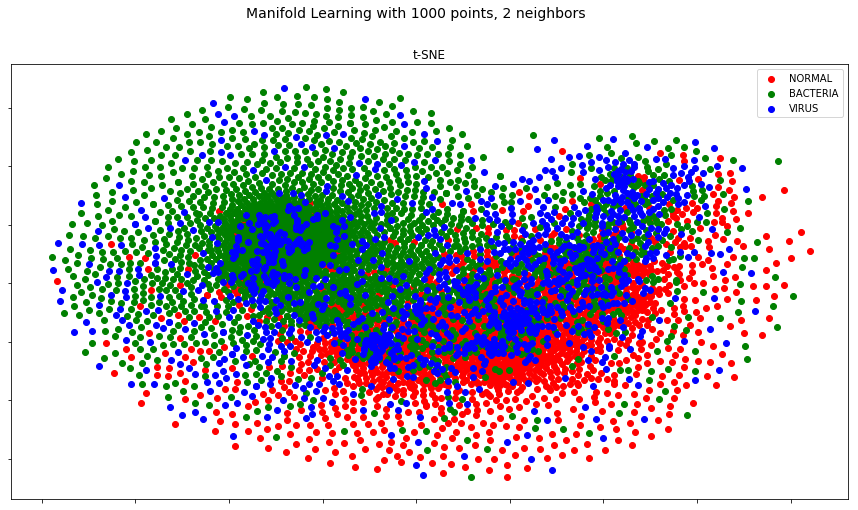

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_components), fontsize=14)

class_0_idx = [i for i in range(len(Y)) if Y[i] == 0]
class_1_idx = [i for i in range(len(Y)) if Y[i] == 1]
class_2_idx = [i for i in range(len(Y)) if Y[i] == 2]

# plot in 2 components
plt.scatter(pos_tsne[class_0_idx, 0], pos_tsne[class_0_idx, 1], c=["r"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_1_idx, 0], pos_tsne[class_1_idx, 1], c=["g"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_2_idx, 0], pos_tsne[class_2_idx, 1], c=["b"], cmap=plt.cm.Spectral)
ax = fig.add_subplot(111)
plt.title("t-SNE" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.legend(('NORMAL', 'BACTERIA', 'VIRUS'),
           loc='upper right')
plt.show()



In [14]:
del(pos_tsne)
del(tsne)
del(train_data)
del(x)
del(Y)

import gc
gc.collect()

0

## Data Loader

In [16]:
img_width, img_height = 192, 192

from keras import backend as K
from keras.utils import Sequence
import cv2
from itertools import chain
import numpy as np
import pandas as pd
from keras.utils import np_utils

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#Read our dataset in batches
class DataLoader(Sequence):
    def __init__(self, df = None, batch_size=32, nb_classes=nbClasses, 
                 stratify=None,
                 image_shape=(112, 112), 
                 dataAugmentator=None, 
                 shuffle=True, 
                 balanced=True,
                 normalization_fn=None,
                 load_and_preprocess_fn=None, 
                 path_and_class_translation_fn=None):
        self.df = df
        self.image_shape = image_shape
        self.nb_classes = nb_classes
        self.num_stratums = len(df[stratify].unique())
        self.partial_batch_size = int(batch_size // float(self.num_stratums))
        self.shuffle = shuffle

        self.dataAugmentator = dataAugmentator
        self.normalization_fn = normalization_fn
        self.load_and_preprocess_fn = load_and_preprocess_fn
        self.path_and_class_translation_fn = path_and_class_translation_fn

        indexes = {clazz: df[df[stratify] == clazz].index.tolist() for clazz in df[stratify].unique()}
        max_size = max(map(len, indexes.values()))
        self.size = max_size
        self.indexes = {clazz: np.random.choice(values, size=max_size, replace=True) for clazz, values in indexes.items()}
        
        if shuffle:
            self.indexes = {clazz: np.random.permutation(values) for clazz, values in self.indexes.items()}

    def __len__(self):
        return int(np.ceil(self.size / float(self.partial_batch_size)))

    def __getitem__(self, index):
        # Generate indexes of the batch
        #print(index)
        #print(self.partial_batch_size)
        batch_indexes = []
        
        for key, stratum_indexes in self.indexes.items():
            idx_array = range(index * self.partial_batch_size,
                              min(len(stratum_indexes), (index+1) * self.partial_batch_size))
            #print(idx_array)
            #print(stratum_indexes[idx_array])
            batch_indexes.append(stratum_indexes[idx_array])
            
        batch_indexes = list(chain.from_iterable(batch_indexes))
        #print(batch_indexes)
        np.random.shuffle(batch_indexes)
        batch_shape = tuple([len(batch_indexes)]+list(self.image_shape))
        batch_df = self.df.loc[batch_indexes]
        X = []
        Y = []
        
        for i, (index, row) in enumerate(batch_df.iterrows()):
            path, clazz = self.path_and_class_translation_fn(row)
            img = self.load_and_preprocess_fn(path)
            if img is None:
                raise Exception("Unable to load image path: %s" % path)
            if self.dataAugmentator:
                img = self.dataAugmentator(img)            
            if self.normalization_fn:
                img = self.normalization_fn(img)
            X.append(img)
            Y.append(clazz)

        X = np.array(X)
        y = np.array(Y)

        return (X, y)

    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = {clazz: np.random.permutation(values)
                            for clazz, values in self.indexes.items()}


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from functools import partial

IMAGE_SIZE = img_width, img_height
BATCH_SIZE = 64


def path_and_one_hot_class2_translation_fn(row, nb_classes=3, base_path=INPUT_DIR):
    class_map = {'normal': 0, 'bacteria': 1, 'virus': 2}
    return "%s/%s" % (base_path, row.Path), class_map[row.Class2]

train_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'train'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class2', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=True, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class2_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )

## Treinamento usando SGD com SVM linear

In [17]:
from sklearn.linear_model import SGDClassifier

# Training in batches
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

first = True
for i in range(len(train_generator)):
    #print("test", i)
    v = train_generator.__getitem__(i)
    x,y = v
    #print(x.shape)
    #print(y.shape)
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    #print(y)
    #x_pca = x.transform(x)
    if first:
        clf.partial_fit(descriptors, y, classes=[0,1,2])
    else:
        clf.partial_fit(descriptors, y)


In [18]:
del(x)
del(Y)
del(train_data)

import gc 
gc.collect()

161

## Avalia validação

In [18]:
val_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'val'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class2', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=False, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class2_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )

## Avalia os dados do T-SNE para conjunto de validação

In [19]:
import sklearn.metrics as metrics

# validation
all_descriptors = []
Y_label = []
for i in range(len(val_generator)):
    #print("test", i)
    v = val_generator.__getitem__(i)
    x,y = v
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    
    all_descriptors.extend([descriptors[i] for i in range(descriptors.shape[0])])
    Y_label.extend([y[i] for i in range(y.shape[0])])


t-SNE starting...
t-SNE: 7.5e+02 sec


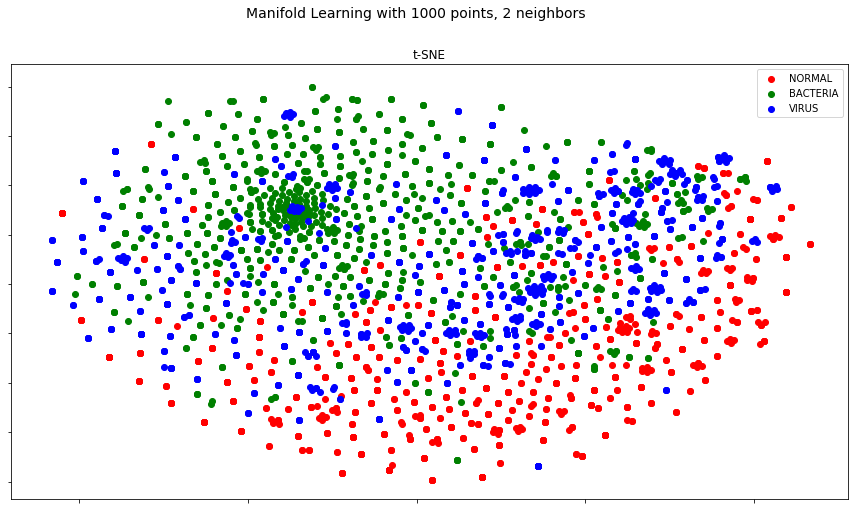

In [20]:

from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

n_components = 2
t0 = time()
print("t-SNE starting...")
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
pos_tsne = tsne.fit_transform(all_descriptors)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_components), fontsize=14)

class_0_idx = [i for i in range(len(Y_label)) if Y_label[i] == 0]
class_1_idx = [i for i in range(len(Y_label)) if Y_label[i] == 1]
class_2_idx = [i for i in range(len(Y_label)) if Y_label[i] == 2]

# plot in 2 components
plt.scatter(pos_tsne[class_0_idx, 0], pos_tsne[class_0_idx, 1], c=["r"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_1_idx, 0], pos_tsne[class_1_idx, 1], c=["g"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_2_idx, 0], pos_tsne[class_2_idx, 1], c=["b"], cmap=plt.cm.Spectral)
ax = fig.add_subplot(111)
plt.title("t-SNE" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.legend(('NORMAL', 'BACTERIA', 'VIRUS'),
           loc='upper right')
plt.show()



In [21]:
del(pos_tsne)
del(all_descriptors)
del(Y_label)
import gc
gc.collect()

91

## Treinamento

Normalized confusion matrix
('validation norm. accuracy: ', 0.4701443569553806)


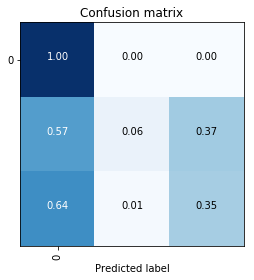

In [20]:
import sklearn.metrics as metrics

# validation
Y_predicted=[]
Y_true=[]
for i in range(len(val_generator)):
    #print("test", i)
    v = val_generator.__getitem__(i)
    x,y = v
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    
    pred = clf.predict(descriptors)

    #print(y.shape)
    #print(pred.shape)
    
    Y_predicted.extend([pred[i] for i in range(pred.shape[0])])
    Y_true.extend([y[i] for i in range(y.shape[0])])


cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("validation norm. accuracy: ", metrics.accuracy_score(Y_true, Y_predicted, normalize=True))


Normalized confusion matrix
('validation 2-classes norm. accuracy: ', 0.5967847769028871)


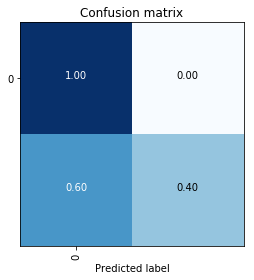

In [21]:
# 2 classes (Normal vs Pneumonia)
Y_predicted =  1*  ([(y > 0) for y in Y_predicted])
Y_true =  1*  ([(y > 0) for y in Y_true])

# Confusion matrix
#print(Y_predicted)
#print(Y_true)
cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)
from sklearn import metrics
print("validation 2-classes norm. accuracy: ",
      metrics.accuracy_score(Y_true, Y_predicted, normalize=True))

In [22]:
# test
test_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'test'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class2', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=False, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class2_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )

Normalized confusion matrix
('test norm. accuracy: ', 0.4696969696969697)


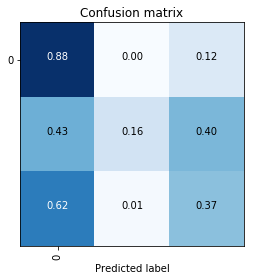

In [23]:
import sklearn.metrics as metrics

# validation
Y_predicted=[]
Y_true=[]
for i in range(len(test_generator)):
    #print("test", i)
    v = test_generator.__getitem__(i)
    x,y = v
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    
    pred = clf.predict(descriptors)
    
    Y_predicted.extend([pred[i] for i in range(pred.shape[0])])
    Y_true.extend([y[i] for i in range(y.shape[0])])


cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("test norm. accuracy: ", metrics.accuracy_score(Y_true, Y_predicted, normalize=True))


Normalized confusion matrix
('test 2-classes norm. accuracy: ', 0.6081267217630854)


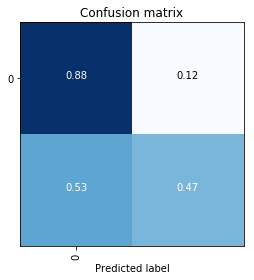

In [24]:
# 2 classes (Normal vs Pneumonia)
Y_predicted =  1*  ([(y > 0) for y in Y_predicted])
Y_true =  1*  ([(y > 0) for y in Y_true])

# Confusion matrix
#print(Y_predicted)
#print(Y_true)
cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)
from sklearn import metrics
print("test 2-classes norm. accuracy: ",
      metrics.accuracy_score(Y_true, Y_predicted, normalize=True))

# Baseline para treinando com 2 classes (Normal vs Pneumonia)

In [25]:
from sklearn.linear_model import SGDClassifier

def path_and_one_hot_class1_translation_fn(row, nb_classes=2, base_path=INPUT_DIR):
    class_map = {'normal': 0, 'pneumonia': 1}
    return "%s/%s" % (base_path, row.Path), class_map[row.Class1]


train_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'train'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class1', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=True, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class1_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )
# Training in batches
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

for i in range(len(train_generator)):
    #print("test", i)
    v = train_generator.__getitem__(i)
    x,y = v
    #print(x.shape)
    #print(y.shape)

    # 1-for pneumonia
    y = [NORMAL if y[i] == NORMAL else 1 for i in range(y.shape[0])]

    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
        
    descriptors = np.array(descriptors)
    
    #print(y)
    #x_pca = x.transform(x)
    clf.partial_fit(descriptors, y, classes=[0,1])


In [26]:
import gc
gc.collect()

15911

# Validation

Normalized confusion matrix
('validation norm. accuracy: ', 0.9050836550836551)


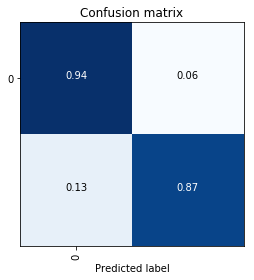

In [27]:
import sklearn.metrics as metrics
# validation

val_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'val'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class1', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=False, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class1_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )

# evaluate class Normal(0) Vs Pneumonia (1)

Y_predicted=[]
Y_true=[]
for i in range(len(val_generator)):
    #print("test", i)
    v = val_generator.__getitem__(i)
    x,y = v
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    
    pred = clf.predict(descriptors)
    
    Y_predicted.extend([(NORMAL if pred[i] == NORMAL else 1) for i in range(pred.shape[0])])
    Y_true.extend([(NORMAL if y[i] == NORMAL else 1) for i in range(y.shape[0])])


cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("validation norm. accuracy: ", metrics.accuracy_score(Y_true, Y_predicted, normalize=True))


Normalized confusion matrix
('test norm. accuracy: ', 0.775)


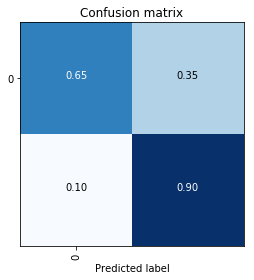

In [28]:
import sklearn.metrics as metrics

# test
test_generator = DataLoader(df=df_protocol2[df_protocol2.Set == 'test'], 
                             batch_size=BATCH_SIZE,
                             stratify='Class1', 
                             image_shape=IMAGE_SIZE, 
                             normalization_fn=None,
                             nb_classes=nbClasses, shuffle=False, 
                             load_and_preprocess_fn=partial(read_img, image_reshape=IMAGE_SIZE),
                             dataAugmentator=None,
                             path_and_class_translation_fn=partial(path_and_one_hot_class1_translation_fn,
                                                                   nb_classes=nbClasses,
                                                                   base_path=INPUT_DIR) )

# evaluate class Normal(0) Vs Pneumonia (1)

Y_predicted=[]
Y_true=[]
for i in range(len(test_generator)):
    #print("test", i)
    v = test_generator.__getitem__(i)
    x,y = v
    
    descriptors = []
    for i in range(x.shape[0]):
        image = x[i]
        lbp_descr = _lbp.describe(image)
        descriptors.append(lbp_descr)
    descriptors = np.array(descriptors)
    
    pred = clf.predict(descriptors)
    
    Y_predicted.extend([pred[i]  for i in range(pred.shape[0])])
    Y_true.extend([(NORMAL if y[i] == NORMAL else 1) for i in range(y.shape[0])])


cm = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("test norm. accuracy: ", metrics.accuracy_score(Y_true, Y_predicted, normalize=True))
